In [14]:
import os , librosa
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "../data/PhishingVoiceDataset"  
rows = []

for label_dir in ["Phishing", "NonPhishing"]:
    label = 1 if label_dir == "Phishing" else 0
    folder = os.path.join(base_path, label_dir)
    for fname in os.listdir(folder):
        if fname.endswith(".mp3"):
            fpath = os.path.join(folder, fname)
            try:
                y, sr = librosa.load(fpath, sr=None)
                duration = librosa.get_duration(y=y, sr=sr)
                rows.append({
                    "filename": fname,
                    "label": label,
                    "sample_rate": sr,
                    "duration_sec": duration,
                    "path": fpath
                })
            except Exception as e:
                print(f"Error reading {fpath}: {e}")

df = pd.DataFrame(rows)
df.tail()



,filename,label,sample_rate,duration_sec,path
75,10.mp3,0,44100,6.264014,../data/PhishingVoiceDataset/NonPhishing/10.mp3
76,12.mp3,0,44100,5.904739,../data/PhishingVoiceDataset/NonPhishing/12.mp3
77,13.mp3,0,44100,3.624014,../data/PhishingVoiceDataset/NonPhishing/13.mp3
78,8.mp3,0,44100,8.232018,../data/PhishingVoiceDataset/NonPhishing/8.mp3
79,9.mp3,0,44100,4.344014,../data/PhishingVoiceDataset/NonPhishing/9.mp3


In [7]:
df.to_csv("../data/data_manifest.csv", index=False)


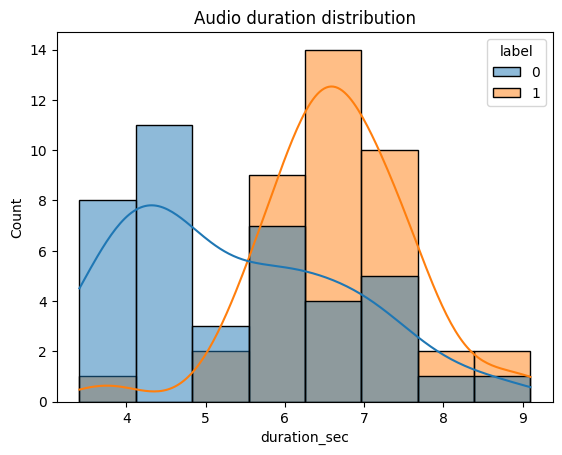

Average phishing duration: 6.657611111111112
Average non-phishing duration: 5.346627551020409


In [8]:
sns.histplot(data=df, x="duration_sec", hue="label", kde=True)
plt.title("Audio duration distribution")
plt.show()

print("Average phishing duration:", df[df.label==1]['duration_sec'].mean())
print("Average non-phishing duration:", df[df.label==0]['duration_sec'].mean())


In [16]:
import IPython.display as ipd

sample = df.iloc[78]
y, sr = librosa.load(sample["path"], sr=16000)
print("Label:", "Phishing" if sample["label"] else "Non-phishing")
ipd.Audio(y, rate=sr)


Label: Non-phishing


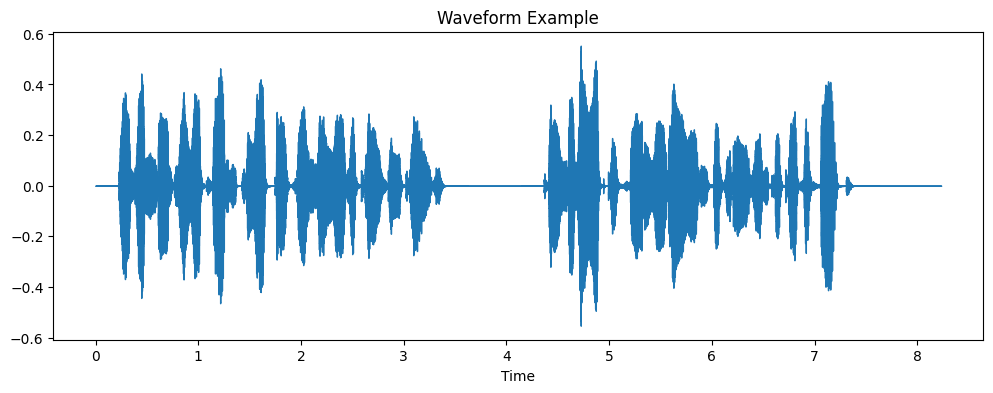

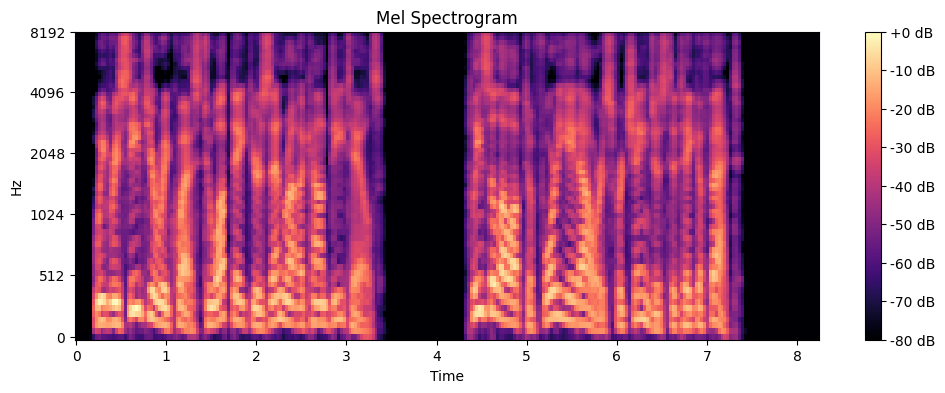

In [17]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Example")
plt.show()

plt.figure(figsize=(12, 4))
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()
